<a href="https://colab.research.google.com/github/Brycealong/Brycealong/blob/main/Copy_of_single_cell_analysis_complete_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -r raw_counts/
!rm -r singlecell/
!rm *.csv
!rm *.zip

In [1]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 6.5 MB/s 
     |████████████████████████████████| 88 kB 6.6 MB/s 
     |████████████████████████████████| 96 kB 4.4 MB/s 
     |████████████████████████████████| 11.2 MB 43.8 MB/s 
     |████████████████████████████████| 965 kB 44.1 MB/s 
     |████████████████████████████████| 1.1 MB 54.6 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=c9754687196a1f722c6790c1dbe96abd9762d7746fc39638c9b13b7b3adf9c0d
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=d835966914c580c49e9670a118e5367fc1e1ea1740ba2b244735de6b8e162ef4
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f

In [1]:
!pip install scikit-misc --force

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 32.0 MB/s 
     |████████████████████████████████| 15.7 MB 52.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [1]:
!ls -a

.  ..  .config	sample_data


In [2]:
!git clone https://github.com/Brycealong/singlecell.git
!mv singlecell/raw_counts .

Cloning into 'singlecell'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 40 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), done.
Checking out files: 100% (28/28), done.


In [3]:
!ls

raw_counts  sample_data  singlecell


In [4]:
!for i in raw_counts/*; do unzip ${i}; done
!mv *.csv raw_counts/

Archive:  raw_counts/GSM5226574_C51ctr_raw_counts.csv.zip
  inflating: GSM5226574_C51ctr_raw_counts.csv  
Archive:  raw_counts/GSM5226575_C52ctr_raw_counts.csv.zip
  inflating: GSM5226575_C52ctr_raw_counts.csv  
Archive:  raw_counts/GSM5226576_C53ctr_raw_counts.csv.zip
  inflating: GSM5226576_C53ctr_raw_counts.csv  
Archive:  raw_counts/GSM5226577_C54ctr_raw_counts.csv.zip
  inflating: GSM5226577_C54ctr_raw_counts.csv  
Archive:  raw_counts/GSM5226578_C55ctr_raw_counts.csv.zip
  inflating: GSM5226578_C55ctr_raw_counts.csv  
Archive:  raw_counts/GSM5226579_C56ctr_raw_counts.csv.zip
  inflating: GSM5226579_C56ctr_raw_counts.csv  
Archive:  raw_counts/GSM5226580_C57ctr_raw_counts.csv.zip
  inflating: GSM5226580_C57ctr_raw_counts.csv  
Archive:  raw_counts/GSM5226581_L01cov_raw_counts.csv.zip
  inflating: GSM5226581_L01cov_raw_counts.csv  
Archive:  raw_counts/GSM5226582_L03cov_raw_counts.csv.zip
  inflating: GSM5226582_L03cov_raw_counts.csv  
Archive:  raw_counts/GSM5226583_L04cov_raw_cou

In [5]:
import scanpy as sc

In [6]:
adata = sc.read_csv('raw_counts/GSM5226574_C51ctr_raw_counts.csv').T
adata

AnnData object with n_obs × n_vars = 6099 × 34546

In [7]:
adata.obs

""
TAGGTACCATGGCCAC-1_1
ATTCACTGTAACAGGC-1_1
TAACTTCCAACCACGC-1_1
TTGGGTACACGACAAG-1_1
AGGCCACAGAGTCACG-1_1
...
CGCCATTGTTTGCCGG-1_1
CACTGGGGTCTACGTA-1_1
CATACTTGTAGAGGAA-1_1
TTTGGTTTCCACGGAC-1_1


In [8]:
adata.var

""
AL627309.1
AL627309.5
AL627309.4
AL669831.2
LINC01409
...
VN1R2
AL031676.1
SMIM34A
AL050402.1


In [9]:
adata.X.shape

(6099, 34546)

# Preprocessing

In [10]:
adata.var

""
AL627309.1
AL627309.5
AL627309.4
AL669831.2
LINC01409
...
VN1R2
AL031676.1
SMIM34A
AL050402.1


In [11]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')

In [12]:
adata.var

,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


In [13]:
import pandas as pd

In [14]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [15]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [16]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [17]:
adata.var

,mt,ribo
AL627309.1,False,False
AL627309.5,False,False
AL627309.4,False,False
AL669831.2,False,False
LINC01409,False,False
...,...,...
VN1R2,False,False
AL031676.1,False,False
SMIM34A,False,False
AL050402.1,False,False


In [18]:
adata.obs

""
TAGGTACCATGGCCAC-1_1
ATTCACTGTAACAGGC-1_1
TAACTTCCAACCACGC-1_1
TTGGGTACACGACAAG-1_1
AGGCCACAGAGTCACG-1_1
...
CGCCATTGTTTGCCGG-1_1
CACTGGGGTCTACGTA-1_1
CATACTTGTAGAGGAA-1_1
TTTGGTTTCCACGGAC-1_1


In [19]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [20]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,False,False,8,0.001312,99.868831,8.0
AL627309.5,False,False,33,0.005411,99.458928,33.0
AL627309.4,False,False,4,0.000656,99.934415,4.0
AL669831.2,False,False,2,0.000328,99.967208,2.0
LINC01409,False,False,274,0.048697,95.507460,297.0
...,...,...,...,...,...,...
VN1R2,False,False,0,0.000000,100.000000,0.0
AL031676.1,False,False,0,0.000000,100.000000,0.0
SMIM34A,False,False,0,0.000000,100.000000,0.0
AL050402.1,False,False,0,0.000000,100.000000,0.0


In [21]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGTACCATGGCCAC-1_1,6764,24256.0,153.0,0.630772,55.0,0.226748
ATTCACTGTAACAGGC-1_1,6686,19020.0,404.0,2.124080,115.0,0.604627
TAACTTCCAACCACGC-1_1,5158,15645.0,221.0,1.412592,211.0,1.348674
TTGGGTACACGACAAG-1_1,4900,15220.0,3.0,0.019711,5.0,0.032852
AGGCCACAGAGTCACG-1_1,5544,13217.0,417.0,3.155028,82.0,0.620413
...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,299,405.0,0.0,0.000000,2.0,0.493827


In [22]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL445072.1,False,False,0,0.000000,100.000000,0.0
AC073270.1,False,False,0,0.000000,100.000000,0.0
AC073349.5,False,False,0,0.000000,100.000000,0.0
AC005482.1,False,False,0,0.000000,100.000000,0.0
SPDYE8P,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0
NEAT1,False,False,4546,5.314150,25.463191,32411.0
MBNL1,False,False,4554,2.877029,25.332022,17547.0
ZBTB20,False,False,4699,2.601082,22.954583,15864.0


In [23]:
sc.pp.filter_genes(adata, min_cells=3)

In [24]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AL929091.1,False,False,3,0.000492,99.950812,3.0,3
AC006441.3,False,False,3,0.000492,99.950812,3.0,3
AC022017.1,False,False,3,0.000492,99.950812,3.0,3
AC024597.1,False,False,3,0.000492,99.950812,3.0,3
PCARE,False,False,3,0.000492,99.950812,3.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0,4458
NEAT1,False,False,4546,5.314150,25.463191,32411.0,4546
MBNL1,False,False,4554,2.877029,25.332022,17547.0,4554
ZBTB20,False,False,4699,2.601082,22.954583,15864.0,4699


In [25]:
adata.obs.sort_values('n_genes_by_counts')

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGGTTTCTGGCTGG-1_1,276,419.0,1.0,0.238663,1.0,0.238663
CGTGCTTCAAAGGGCT-1_1,277,432.0,41.0,9.490741,0.0,0.000000
TGACAGTTCTAAACGC-1_1,278,414.0,0.0,0.000000,0.0,0.000000
CTCTGGTCACGACGAA-1_1,285,407.0,0.0,0.000000,0.0,0.000000
GTAAGTCGTATCGCGC-1_1,289,430.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...
TAACTTCCAACCACGC-1_1,5158,15645.0,221.0,1.412592,211.0,1.348674
CACTGAAGTCGAAGCA-1_1,5487,12725.0,355.0,2.789784,82.0,0.644401
AGGCCACAGAGTCACG-1_1,5544,13217.0,417.0,3.155028,82.0,0.620413
ATTCACTGTAACAGGC-1_1,6686,19020.0,404.0,2.124080,115.0,0.604627


In [26]:
#sc.pp.filter_cells(adata, min_genes=200)

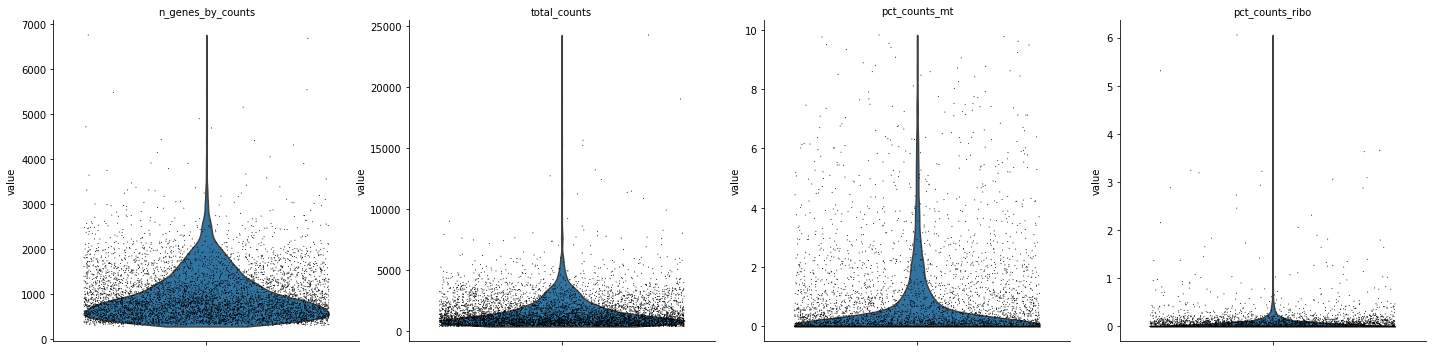

In [27]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [28]:
import numpy as np

In [29]:
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
#upper_lim = 3000

In [30]:
upper_lim

2479.08

In [31]:
adata = adata[adata.obs.n_genes_by_counts < upper_lim]

In [32]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
CGTTCTGGTACTAGCT-1_1,2434,6047.0,6.0,0.099223,1.0,0.016537
CTGGCAGGTTCGGTAT-1_1,2444,5899.0,307.0,5.204272,5.0,0.084760
ACACCAACACAACGCC-1_1,2451,5497.0,0.0,0.000000,3.0,0.054575
CCTCAACCATACAGGG-1_1,2276,5434.0,38.0,0.699301,0.0,0.000000
ACAAAGATCCACAGGC-1_1,2310,5504.0,1.0,0.018169,1.0,0.018169
...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,299,405.0,0.0,0.000000,2.0,0.493827


In [33]:
adata = adata[adata.obs.pct_counts_mt < 20]

In [34]:
adata = adata[adata.obs.pct_counts_ribo < 2]

In [35]:
adata

View of AnnData object with n_obs × n_vars = 5960 × 24660
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

# Normalization

In [36]:
adata.X

ArrayView([[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
adata.X.sum(axis = 1)

ArrayView([6043., 5895., 5496., ...,  410.,  405.,  410.], dtype=float32)

In [38]:
adata.layers['counts'] = adata.X.copy()

In [39]:
sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI

In [40]:
adata.X.sum(axis = 1)

array([10000., 10000., 10000., ..., 10000., 10000., 10000.], dtype=float32)

In [41]:
sc.pp.log1p(adata) #change to log counts

In [42]:
adata.raw = adata

In [43]:
adata.X.sum(axis = 1)

array([3155.047  , 3218.0122 , 3416.0486 , ..., 1191.2708 , 1022.75116,
       1162.8785 ], dtype=float32)

# Clustering

In [44]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)

In [45]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,8,0.001312,99.868831,8.0,8,False,0.011136,2.697174,1.153160
AL627309.5,False,False,33,0.005411,99.458928,33.0,33,False,0.028855,2.254608,-0.150810
AL627309.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002331,1.702854,-1.776493
LINC01409,False,False,274,0.048697,95.507460,297.0,274,False,0.270478,2.286819,-0.055904
FAM87B,False,False,6,0.000984,99.901623,6.0,6,False,0.006682,1.947490,-1.055700
...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,False,False,133,0.022627,97.819315,138.0,133,False,0.153974,2.375807,0.206288
AL592183.1,False,False,1003,0.198721,83.554681,1212.0,1003,False,0.875225,2.469386,-0.406744
AC240274.1,False,False,162,0.027382,97.343827,167.0,162,False,0.150268,2.265893,-0.117561
AC007325.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002801,1.579830,-2.138971


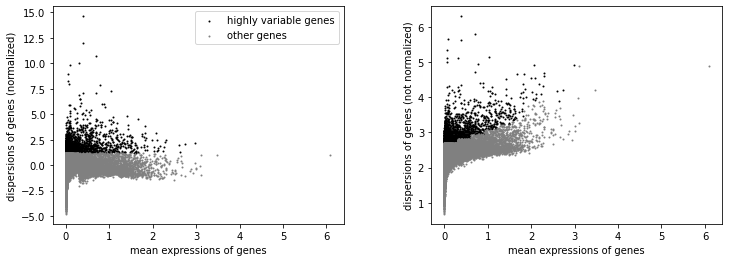

In [46]:
sc.pl.highly_variable_genes(adata)

In [47]:
adata = adata[:, adata.var.highly_variable]

In [48]:
adata

View of AnnData object with n_obs × n_vars = 5960 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [49]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

In [50]:
sc.pp.scale(adata, max_value=10)

In [51]:
sc.tl.pca(adata, svd_solver='arpack')

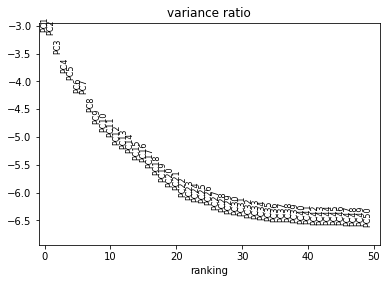

In [52]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [53]:
sc.pp.neighbors(adata, n_pcs = 30)

In [54]:
adata

AnnData object with n_obs × n_vars = 5960 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [55]:
adata.obsp['connectivities']

<5960x5960 sparse matrix of type '<class 'numpy.float32'>'
	with 123616 stored elements in Compressed Sparse Row format>

In [56]:
adata.obsp['connectivities'].toarray()

array([[0.        , 0.05613292, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05613292, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [57]:
adata.obsp['distances'].toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [11.20105362,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [58]:
sc.tl.umap(adata)

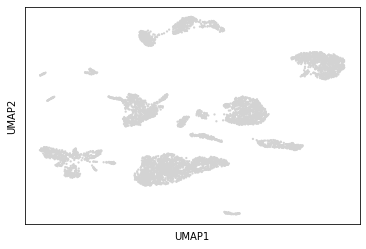

In [59]:
sc.pl.umap(adata)

In [60]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 35.2 MB/s 
     |████████████████████████████████| 3.2 MB 35.5 MB/s 


In [61]:
sc.tl.leiden(adata, resolution = 0.5)

In [62]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
CGTTCTGGTACTAGCT-1_1,2434,6047.0,6.0,0.099223,1.0,0.016537,2
CTGGCAGGTTCGGTAT-1_1,2444,5899.0,307.0,5.204272,5.0,0.084760,2
ACACCAACACAACGCC-1_1,2451,5497.0,0.0,0.000000,3.0,0.054575,1
CCTCAACCATACAGGG-1_1,2276,5434.0,38.0,0.699301,0.0,0.000000,11
ACAAAGATCCACAGGC-1_1,2310,5504.0,1.0,0.018169,1.0,0.018169,2
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,355,410.0,3.0,0.731707,0.0,0.000000,6
CACTGGGGTCTACGTA-1_1,346,403.0,0.0,0.000000,0.0,0.000000,1
CATACTTGTAGAGGAA-1_1,360,410.0,2.0,0.487805,0.0,0.000000,0
TTTGGTTTCCACGGAC-1_1,299,405.0,0.0,0.000000,2.0,0.493827,12


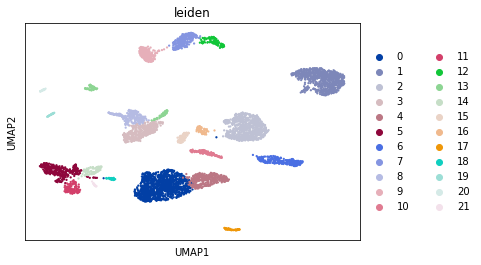

In [63]:
sc.pl.umap(adata, color=['leiden'])

# Find markers/ label cell types

This block below should be run dynamically when you find some information on how to do clusters.

In [64]:
sc.tl.rank_genes_groups(adata, 'leiden')

/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

In [ ]:
#sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [65]:
sc.get.rank_genes_groups_df(adata, None)

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,SKAP1,58.691345,5.449939,0.000000e+00,0.000000e+00
1,0,PARP8,57.361019,4.693031,0.000000e+00,0.000000e+00
2,0,ARHGAP15,54.162720,4.521955,0.000000e+00,0.000000e+00
3,0,PTPRC,50.084412,4.348276,0.000000e+00,0.000000e+00
4,0,IKZF1,49.017265,4.593487,1.197042e-318,2.838371e-316
...,...,...,...,...,...,...
542515,21,LIMCH1,-59.557934,-31.303123,0.000000e+00,0.000000e+00
542516,21,PARD3,-62.931797,-30.990692,0.000000e+00,0.000000e+00
542517,21,RORA,-64.998871,-31.234604,0.000000e+00,0.000000e+00
542518,21,SYNE2,-70.325951,-31.352674,0.000000e+00,0.000000e+00


In [66]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,SKAP1,58.691345,5.449939,0.000000e+00,0.000000e+00
1,0,PARP8,57.361019,4.693031,0.000000e+00,0.000000e+00
2,0,ARHGAP15,54.162720,4.521955,0.000000e+00,0.000000e+00
3,0,PTPRC,50.084412,4.348276,0.000000e+00,0.000000e+00
4,0,IKZF1,49.017265,4.593487,1.197042e-318,2.838371e-316
...,...,...,...,...,...,...
518258,21,AL807761.4,2.336071,4.478615,3.124931e-02,4.880045e-02
518259,21,SNX10,2.332645,2.960603,3.145258e-02,4.905575e-02
518260,21,MYCBP2,2.332347,1.261528,3.140042e-02,4.898680e-02
518261,21,USP48,2.330537,1.773758,3.155668e-02,4.919945e-02


In [67]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
CGTTCTGGTACTAGCT-1_1,2434,6047.0,6.0,0.099223,1.0,0.016537,2
CTGGCAGGTTCGGTAT-1_1,2444,5899.0,307.0,5.204272,5.0,0.084760,2
ACACCAACACAACGCC-1_1,2451,5497.0,0.0,0.000000,3.0,0.054575,1
CCTCAACCATACAGGG-1_1,2276,5434.0,38.0,0.699301,0.0,0.000000,11
ACAAAGATCCACAGGC-1_1,2310,5504.0,1.0,0.018169,1.0,0.018169,2
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,355,410.0,3.0,0.731707,0.0,0.000000,6
CACTGGGGTCTACGTA-1_1,346,403.0,0.0,0.000000,0.0,0.000000,1
CATACTTGTAGAGGAA-1_1,360,410.0,2.0,0.487805,0.0,0.000000,0
TTTGGTTTCCACGGAC-1_1,299,405.0,0.0,0.000000,2.0,0.493827,12


In [68]:
adata

AnnData object with n_obs × n_vars = 5960 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

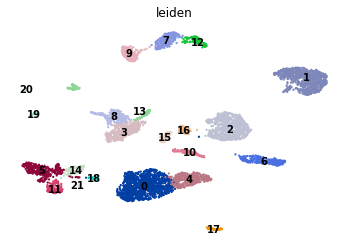

In [71]:
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")

How to easily make an empty dictionary by copying and pasting the output of below code.

In [70]:
for x in range(0, 21):
  print(f'"{x}":"",')

"0":"",
"1":"",
"2":"",
"3":"",
"4":"",
"5":"",
"6":"",
"7":"",
"8":"",
"9":"",
"10":"",
"11":"",
"12":"",
"13":"",
"14":"",
"15":"",
"16":"",
"17":"",
"18":"",
"19":"",
"20":"",


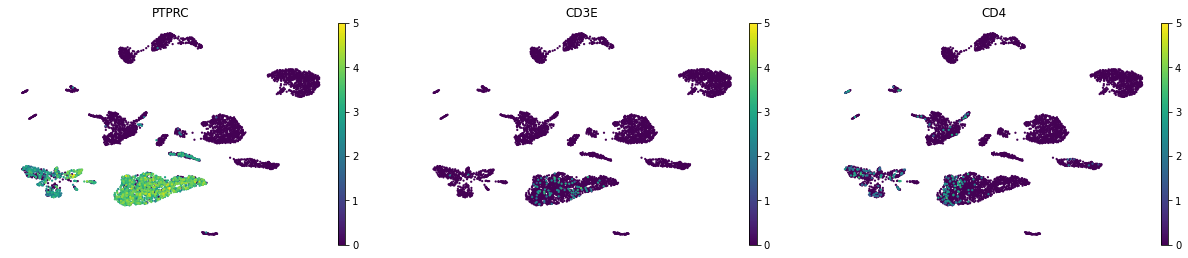

In [72]:
sc.pl.umap(adata, color = ['PTPRC', 'CD3E', 'CD4'], frameon = False, 
#           layer = 'scvi_normalized', 
           vmax = 5)

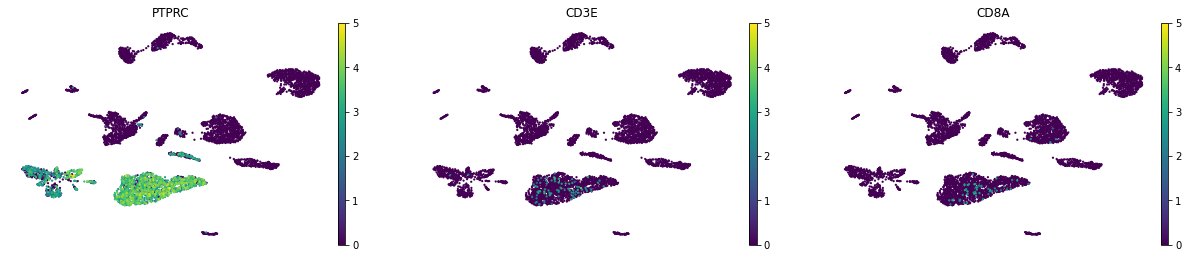

In [73]:
sc.pl.umap(adata, color = ['PTPRC', 'CD3E', 'CD8A'], 
           frameon = False, 
          #  layer = 'scvi_normalized', 
           vmax = 5)

Here's when we change the 'resolution'.

In [76]:
sc.tl.leiden(adata, resolution = 1.2)

Usually it's better to try 0.8 and 1. 

1.2 here is just for display because the source code have 29 types and I don't wanna ruin the consistency.

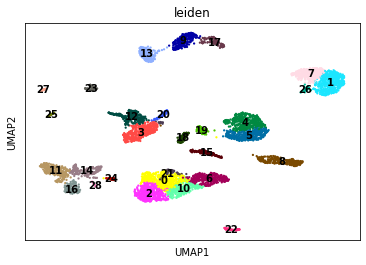

In [84]:
sc.pl.umap(adata, color=['leiden'], legend_loc = "on data")

The 'find marker genes' workflow should be redone after changing the resolution. (Because the cluster number changes)

In [79]:
sc.tl.rank_genes_groups(adata, 'leiden')

/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

In [80]:
sc.get.rank_genes_groups_df(adata, None)

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,ARHGAP15,35.509991,3.845291,3.389507e-154,2.795493e-152
1,0,PARP8,32.967651,3.751422,4.031390e-139,2.738680e-137
2,0,SKAP1,30.235769,3.819680,1.083639e-123,6.185773e-122
3,0,PTPRC,27.344875,3.305321,4.876755e-109,2.386126e-107
4,0,IKZF1,26.971930,3.426460,2.461286e-106,1.145195e-104
...,...,...,...,...,...,...
715135,28,LIMCH1,-59.557934,-31.303123,0.000000e+00,0.000000e+00
715136,28,PARD3,-62.931797,-30.990692,0.000000e+00,0.000000e+00
715137,28,RORA,-64.998871,-31.234604,0.000000e+00,0.000000e+00
715138,28,SYNE2,-70.325951,-31.352674,0.000000e+00,0.000000e+00


In [81]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,ARHGAP15,35.509991,3.845291,3.389507e-154,2.795493e-152
1,0,PARP8,32.967651,3.751422,4.031390e-139,2.738680e-137
2,0,SKAP1,30.235769,3.819680,1.083639e-123,6.185773e-122
3,0,PTPRC,27.344875,3.305321,4.876755e-109,2.386126e-107
4,0,IKZF1,26.971930,3.426460,2.461286e-106,1.145195e-104
...,...,...,...,...,...,...
690878,28,AL807761.4,2.336071,4.478615,3.124931e-02,4.880045e-02
690879,28,SNX10,2.332645,2.960603,3.145258e-02,4.905575e-02
690880,28,MYCBP2,2.332347,1.261528,3.140042e-02,4.898680e-02
690881,28,USP48,2.330537,1.773758,3.155668e-02,4.919945e-02


In [82]:
markers[markers.names == 'CD4']

,group,names,scores,logfoldchanges,pvals,pvals_adj
784,0,CD4,3.246629,1.266640,1.236342e-03,0.003542
49767,2,CD4,4.959946,2.067812,9.912999e-07,0.000004
271726,11,CD4,5.347023,2.595973,1.924332e-07,0.000001
345775,14,CD4,3.833594,2.232315,1.710395e-04,0.000557
396062,16,CD4,3.010741,1.785641,3.124223e-03,0.008777


In [83]:
markers[markers.names == 'CD8A']

,group,names,scores,logfoldchanges,pvals,pvals_adj
838,0,CD8A,3.092067,2.194888,0.002089,0.005714
247040,10,CD8A,3.751944,3.306223,0.000216,0.000681


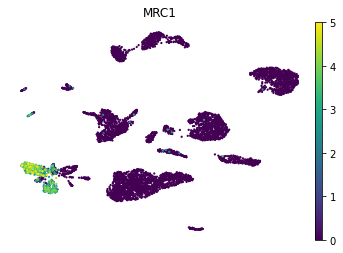

In [85]:
# macrophages
sc.pl.umap(adata, color = ['MRC1'], frameon = False, vmax = 5)

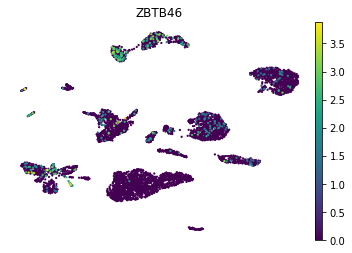

In [86]:
# dendritic cells
sc.pl.umap(adata, color = ['ZBTB46'], frameon = False
          #  vmax = 5
           )

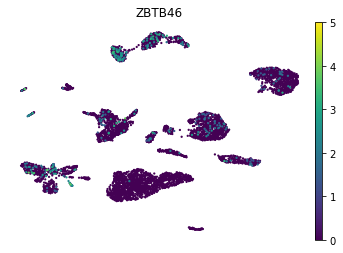

In [87]:
# dendritic cells
sc.pl.umap(adata, color = ['ZBTB46'], frameon = False,
           vmax = 5
           )

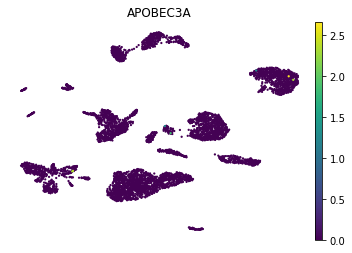

In [88]:
# monocytes
sc.pl.umap(adata, color = ['APOBEC3A'], frameon = False
          #  vmax = 5
           )

In [89]:
# hard to tell from the plot 
markers[markers.names == 'APOBEC3A']

,group,names,scores,logfoldchanges,pvals,pvals_adj


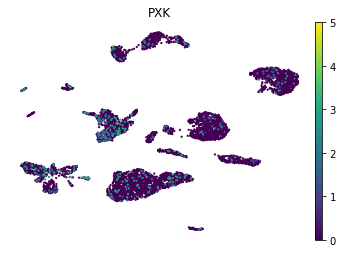

In [90]:
# B cells
sc.pl.umap(adata, color = ['PXK'], frameon = False, vmax = 5)

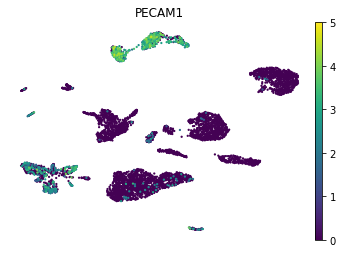

In [91]:
# Endothelial cells
sc.pl.umap(adata, color = ['PECAM1'], frameon = False, vmax = 5)

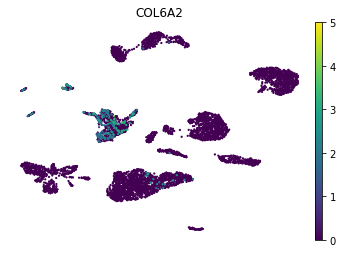

In [92]:
# Fibroblasts
sc.pl.umap(adata, color = ['COL6A2'], frameon = False, vmax = 5)

In [93]:
markers[markers.names == 'COL6A2']

,group,names,scores,logfoldchanges,pvals,pvals_adj
74313,3,COL6A2,8.841735,3.426705,2.237743e-17,2.010300e-16
296117,12,COL6A2,8.139490,3.749295,1.788607e-14,1.854796e-13
493456,20,COL6A2,2.849130,2.646997,5.882770e-03,1.258516e-02
567265,23,COL6A2,4.492548,4.091961,4.285356e-05,1.234543e-04


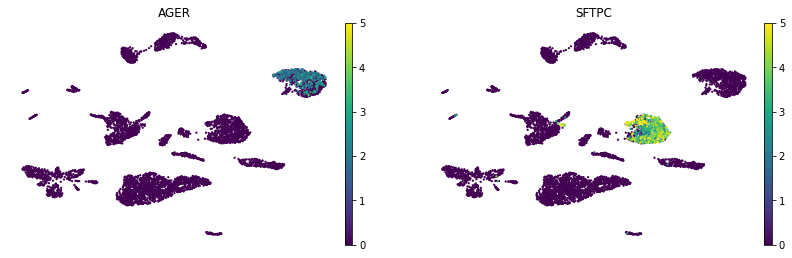

In [94]:
# AT1, AT2
sc.pl.umap(adata, color = ['AGER', 'SFTPC'], frameon = False, vmax = 5)

Work the other way around by specifying the group number and look at the marker genes.

Panglaodb search.

In [96]:
markers[markers.group == '23'].sor

,group,names,scores,logfoldchanges,pvals,pvals_adj
567180,23,SORBS1,14.157293,6.238967,5.436990e-19,4.226866e-18
567181,23,SYNPO2,13.992270,7.837069,9.403539e-19,7.210549e-18
567182,23,CACNA1C,13.572910,5.852095,2.746813e-18,2.048893e-17
567183,23,PRKG1,13.204988,4.626665,6.373574e-18,4.659720e-17
567184,23,MYH11,12.754365,7.060992,3.352589e-17,2.361464e-16
...,...,...,...,...,...,...
567542,23,LHFPL6,2.302756,1.296253,2.553156e-02,4.696466e-02
567543,23,HEPH,2.301537,3.627687,2.564692e-02,4.716630e-02
567544,23,CAP2,2.295218,2.405112,2.602781e-02,4.773508e-02
567545,23,DGKB,2.294697,8.150908,2.607335e-02,4.780081e-02


Double check -- search for several genes.

If there's some problems with finding cell types, try exporting all the markers genes as below. 

Highlight them then Go to [david](https://david.ncifcrf.gov/tools.jsp)



1.   upload gene list
2.   pick gene symbols 'OFFICIAL_GENE_SYMBOL'



In [97]:
for item in markers[markers.group == '20'][0:1000].names:
  print(item)

PRKG1
RBMS3
FGF14
SOX5
ITGBL1
PTPRG
LAMA2
ELN
CALD1
ROBO2
RORA
LAMB1
RERG
LTBP1
ARHGAP10
CFH
FBXL7
HMCN1
UACA
FRMD4B
PLXDC2
DST
ZEB1
LRRTM4
PDZRN3
AGAP1
SH3RF3
MAML2
FN1
TBX5
MAMDC2
ADARB1
ZFPM2
MEIS1
RYR2
DMD
FOXO1
ITGA9
BNC2
SLIT2
RCAN2
TSHZ2
LTBP2
ZFHX3
NRCAM
SEPTIN11
COL5A2
TGFBR3
SPATS2L
PPP1CB
GALNT17
DACH2
NALCN
SCN7A
PRR16
ABI3BP
DTNA
ADAMTS9-AS2
CRISPLD2
COL5A1
CHN1
ANGPT1
CERS6
TENM4
TCF7L2
TENM2
ITGA9-AS1
PCSK5
CHRM2
DENND2A
RBPMS
APBB2
PIK3R1
COL24A1
COL3A1
SAMD4A
RBMS1
PARD3B
NFIB
NPAS3
THRB
ARHGAP24
TNFRSF19
CASC15
ENAH
MYH10
AL109930.1
CTDSPL
ANO4
PDGFRA
DAAM2
BMPER
CCDC68
PPARGC1A
COL6A3
TLN2
SIPA1L1
NR2F1-AS1
PHLDB1
PKD2
PALLD
ROBO1
KLHL29
MITF
SGCD
MAMDC2-AS1
XYLT1
LMOD1
MYLK
MPDZ
SLC38A2
ZNF536
FAT4
PBX1
COL21A1
LMCD1
CACNA1C
FTX
PDE3A
DPYSL3
PRDM6
PAM
SYNPO2
ATP10A
NPNT
AC083870.1
PRKD1
SLC24A3
FANCC
TEX41
LINC00632
MEG8
EYA2
COL1A2
BRINP3
AC013451.1
TNS1
TCF4
AC009264.1
LINC01091
CACNB2
PLEKHH2
CDH13
CCDC102B
SBF2
MAGI2
C1QTNF7
PBX3
ZBTB16
LRP4
TPD52L1
PLSCR4
KCNT2

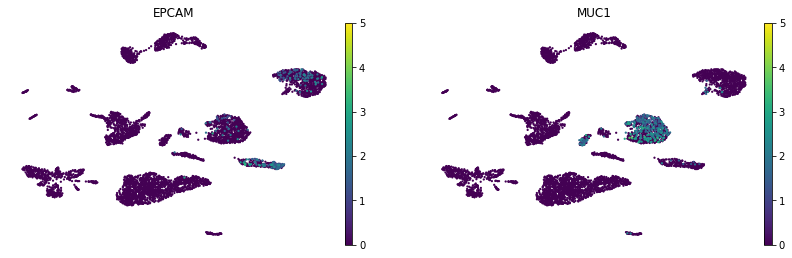

In [98]:
sc.pl.umap(adata, color = ['EPCAM', 'MUC1'], frameon = False, vmax = 5)
#, layer = 'scvi_normalized'

# vmax?

In [99]:
cell_type = {"0":"Macrophage",
"1":"Fibroblast",
"2":"CD4+ T-cell",
"3":"AT2",
"4":"AT1",
"5":"CD8+ T-cell",
"6":"Endothelial cell",
"7":"Plasma cell",
"8":"Macrophage",
"9":"AT2",
"10":"Fibroblast",
"11":"Fibroblast",
"12":"Macrophage",
"13":"Macrophage",
"14":"Airway epithelial",
"15":"Airway epithelial",
"16":"Monocyte",
"17":"Airway epithelial",
"18":"B-cell",
"19":"Aerocyte",
"20":"Airway epithelial",
"21":"Smooth muscle cell",
"22":"Cycling T/NK",
"23":"Neuronal cell",
"24":"Denditic cell",
"25":"Pericyte",
"26":"Fibroblast",
"27":"Erythroid-like",
"28":"Macrophage"
}


In [100]:
adata.obs.leiden.map(cell_type)

CGTTCTGGTACTAGCT-1_1                  AT1
CTGGCAGGTTCGGTAT-1_1                  AT1
ACACCAACACAACGCC-1_1          Plasma cell
CCTCAACCATACAGGG-1_1             Monocyte
ACAAAGATCCACAGGC-1_1                  AT1
                              ...        
CGCCATTGTTTGCCGG-1_1           Macrophage
CACTGGGGTCTACGTA-1_1           Fibroblast
CATACTTGTAGAGGAA-1_1           Macrophage
TTTGGTTTCCACGGAC-1_1    Airway epithelial
ATGCATGAGTCATGAA-1_1           Fibroblast
Name: leiden, Length: 5960, dtype: object

In [101]:
adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)
# always use underscore instead of spaces!!!

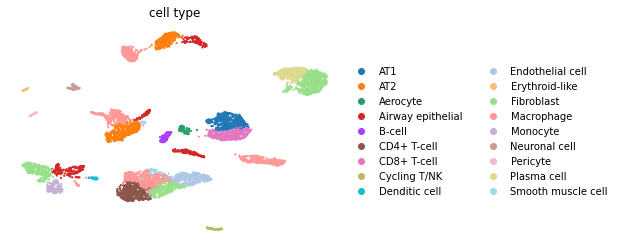

In [102]:
sc.pl.umap(adata, color = ['cell_type'], frameon = False)

In [103]:
adata

AnnData object with n_obs × n_vars = 5960 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'cell type'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups', 'cell type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [104]:
# adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

In [105]:
adata.write_h5ad('adata_single.h5ad')

In [ ]:
# model.save('model.model')

# Analysis

In [ ]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

## Counting cells

In [ ]:
adata = sc.read_h5ad('integrated.h5ad')

Because we don't integrate the samples, so right now we can't do this.

In [ ]:
adata.obs.Sample.unique().tolist()

In [ ]:
def map_condition(x):
    if 'cov' in x:
        return 'COVID19'
    else:
        return 'control'

In [ ]:
adata.obs['condition'] = adata.obs.Sample.map(map_condition)
adata.obs

In [ ]:
num_tot_cells = adata.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

In [ ]:
cell_type_counts = adata.obs.groupby(['Sample', 'condition', 'cell_type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

In [ ]:
cell_type_counts['total_cells'] = cell_type_counts.Sample.map(num_tot_cells).astype(int)

cell_type_counts['frequency'] = cell_type_counts.doublet / cell_type_counts.total_cells

cell_type_counts

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))

ax = sns.boxplot(data = cell_type_counts, x = 'cell_type', y = 'frequency', hue = 'condition')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.show()


## DE

In [106]:
subset = adata[adata.obs['cell_type'].isin(['AT1', 'AT2'])].copy()

In [ ]:
# two options: SCVI or diffxpy

### DE with diffxpy

In [107]:
!pip install diffxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.0 MB/s 
     |████████████████████████████████| 140 kB 64.3 MB/s 
     |████████████████████████████████| 77 kB 7.4 MB/s 


In [108]:
import diffxpy.api as de

In [115]:
subset = subset.raw.to_adata() 
#need to run this if you scaled/regress your data and have negative numbers

In [ ]:
# subset.X = subset.X.toarray()

In [118]:
len(subset.var)

24660

In [111]:
subset

AnnData object with n_obs × n_vars = 1090 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'cell type'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups', 'cell type_colors', 'markers'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [119]:
sc.pp.filter_genes(subset, min_cells=100)

In [120]:
len(subset.var)

3439

In [114]:
# rename
subset.obs = subset.obs.rename(columns = {'cell type':'cell_type'})

In [116]:
subset.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden,cell_type
CGTTCTGGTACTAGCT-1_1,2434,6047.0,6.0,0.099223,1.0,0.016537,4,AT1
CTGGCAGGTTCGGTAT-1_1,2444,5899.0,307.0,5.204272,5.0,0.084760,4,AT1
ACAAAGATCCACAGGC-1_1,2310,5504.0,1.0,0.018169,1.0,0.018169,4,AT1
ATACTTCCAAGGTCTT-1_1,2122,5252.0,1.0,0.019040,4.0,0.076161,4,AT1
CAGGGCTGTGCACAAG-1_1,2323,5187.0,4.0,0.077116,1.0,0.019279,4,AT1
...,...,...,...,...,...,...,...,...
CTGCAGGGTGATAGTA-1_1,313,407.0,0.0,0.000000,0.0,0.000000,9,AT2
ATATCCTGTCGGCTAC-1_1,317,404.0,0.0,0.000000,0.0,0.000000,9,AT2
GTAACACAGTTTGGCT-1_1,316,404.0,0.0,0.000000,0.0,0.000000,3,AT2
TCATATCTCATGCGGC-1_1,301,410.0,0.0,0.000000,0.0,0.000000,3,AT2


In [121]:
#if want to test between covid/non covid
# res = de.test.wald(data=subset,
#              formula_loc= '~ 1 + condition',
#              factor_loc_totest='condition'
#                   )


res = de.test.wald(data=subset,
             formula_loc= '~ 1 + cell_type',
             factor_loc_totest='cell_type'
                  )

training location model: False
training scale model: True
iter   0: ll=15885675.298224
iter   1: ll=15885675.298224, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=3898283.667218, converged: 0.03% (loc: 0.03%, scale update: True), in 33.59sec
iter   3: ll=3898283.667218, converged: 0.03% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=3869417.004418, converged: 97.62% (loc: 97.62%, scale update: True), in 23.90sec
iter   5: ll=3869417.004418, converged: 97.62% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=3859560.487425, converged: 99.39% (loc: 99.39%, scale update: True), in 3.86sec
iter   7: ll=3859560.487425, converged: 99.39% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=3859281.197769, converged: 99.88% (loc: 99.88%, scale update: True), in 4.05sec
iter   9: ll=3859281.197769, converged: 99.88% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=3859278.960287, converged: 99.97% (loc: 99.97%, scale 

/usr/local/lib/python3.7/dist-packages/dask/array/core.py:3062: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


In [122]:
dedf = res.summary()
dedf

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,CCNL2,0.177154,0.219723,-0.191710,0.454793,False,1.065697e-08,-0.191710,0.142052,-958.675822
1,GNB1,0.027904,0.040421,0.281013,0.613087,False,1.716617e-08,0.281013,0.127812,-1145.224694
2,PRKCZ,0.000000,0.000000,-2.490610,0.324828,False,1.224423e-09,-2.490610,0.167971,-651.179616
3,SKI,0.023762,0.034759,0.343261,0.501118,False,2.408523e-08,0.343261,0.151821,-996.355102
4,PRDM16,0.000000,0.000000,-2.647623,0.300985,False,5.601798e-10,-2.647623,0.185392,-611.829849
...,...,...,...,...,...,...,...,...,...,...
3434,MT-CO3,0.000000,0.000000,-5.183390,0.391701,False,8.587761e-12,-5.183390,0.498527,-572.482756
3435,MT-ND3,0.000000,0.000000,-4.061099,0.457066,False,8.102379e-09,-4.061099,0.284220,-649.064286
3436,MT-ND4,0.000000,0.000000,-5.045851,0.343565,False,1.574442e-08,-5.045851,0.499000,-533.699312
3437,MT-CYB,0.000000,0.000000,-4.476959,0.316670,False,3.379613e-10,-4.476959,0.400216,-523.997050


In [123]:
dedf = res.summary().sort_values('log2fc', ascending = False).reset_index(drop = True)
dedf

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,PCDH15,0.0,0.0,283.913085,0.671789,False,5.211003e-01,283.913085,2.222759e-162,-4688.202118
1,AC009975.1,0.0,0.0,283.913085,0.215241,False,1.853207e-01,283.913085,2.222759e-162,-1643.151254
2,CCN2,0.0,0.0,283.913085,0.388566,False,3.119261e-01,283.913085,2.222759e-162,-2792.694114
3,SVEP1,0.0,0.0,283.913085,0.823864,False,5.651374e-01,283.913085,2.222759e-162,-5168.527920
4,CDH13,0.0,0.0,283.913085,0.639468,False,4.642208e-01,283.913085,2.222759e-162,-4212.969895
...,...,...,...,...,...,...,...,...,...,...
3434,FHDC1,0.0,0.0,-297.776029,0.159143,False,4.070715e-10,-297.776029,2.222759e-162,-346.963741
3435,KCNK1,0.0,0.0,-297.776029,0.241121,False,6.907939e-12,-297.776029,2.222759e-162,-440.542221
3436,TLR2,0.0,0.0,-297.776029,0.164879,False,4.945127e-10,-297.776029,2.222759e-162,-354.953943
3437,PPP1R14C,0.0,0.0,-297.776029,0.194715,False,2.915910e-10,-297.776029,2.222759e-162,-390.949405


In [124]:
subset.obs.cell_type.unique()

['AT1', 'AT2']
Categories (2, object): ['AT1', 'AT2']

In [125]:
most_up = dedf.iloc[0].gene
i = np.where(subset.var_names == most_up)[0][0]

a = subset[subset.obs.cell_type == 'AT1'].X[:, i]
b = subset[subset.obs.cell_type == 'AT2'].X[:, i]
print(f"{most_up} expression:")
print(f"AT1: {a.mean()}")
print(f"AT2: {b.mean()}")


PCDH15 expression:
AT1: 0.0
AT2: 1.047568678855896


Confirming that AT2 is the testing group.

In [126]:
dedf['log2fc'] = dedf['log2fc']*-1
dedf = dedf.sort_values('log2fc', ascending = False).reset_index(drop = True)
dedf

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,PGC,0.0,0.0,297.776029,0.274895,False,2.252332e-10,-297.776029,2.222759e-162,-472.649544
1,CLDN18,0.0,0.0,297.776029,0.210905,False,2.441329e-10,-297.776029,2.222759e-162,-408.787909
2,LDHB,0.0,0.0,297.776029,0.174559,False,6.782783e-11,-297.776029,2.222759e-162,-362.421910
3,LMO3,0.0,0.0,297.776029,0.482876,False,4.434926e-05,-297.776029,2.222759e-162,-590.569562
4,MGST1,0.0,0.0,297.776029,0.508471,False,6.614452e-08,-297.776029,2.222759e-162,-584.209625
...,...,...,...,...,...,...,...,...,...,...
3434,ANO1,0.0,0.0,-283.913085,0.246670,False,2.110086e-01,283.913085,2.222759e-162,-1871.767770
3435,TBX2,0.0,0.0,-283.913085,0.347979,False,2.899085e-01,283.913085,2.222759e-162,-2581.544885
3436,HMGCLL1,0.0,0.0,-283.913085,0.256435,False,2.275224e-01,283.913085,2.222759e-162,-2007.950906
3437,ABCA6,0.0,0.0,-283.913085,0.639748,False,4.954124e-01,283.913085,2.222759e-162,-4458.002180


In [127]:
dedf = dedf[(dedf.qval < 0.05) & (abs(dedf.log2fc) > .5)]
dedf

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,PGC,0.0,0.0,297.776029,0.274895,False,2.252332e-10,-297.776029,2.222759e-162,-472.649544
1,CLDN18,0.0,0.0,297.776029,0.210905,False,2.441329e-10,-297.776029,2.222759e-162,-408.787909
2,LDHB,0.0,0.0,297.776029,0.174559,False,6.782783e-11,-297.776029,2.222759e-162,-362.421910
3,LMO3,0.0,0.0,297.776029,0.482876,False,4.434926e-05,-297.776029,2.222759e-162,-590.569562
4,MGST1,0.0,0.0,297.776029,0.508471,False,6.614452e-08,-297.776029,2.222759e-162,-584.209625
...,...,...,...,...,...,...,...,...,...,...
3434,ANO1,0.0,0.0,-283.913085,0.246670,False,2.110086e-01,283.913085,2.222759e-162,-1871.767770
3435,TBX2,0.0,0.0,-283.913085,0.347979,False,2.899085e-01,283.913085,2.222759e-162,-2581.544885
3436,HMGCLL1,0.0,0.0,-283.913085,0.256435,False,2.275224e-01,283.913085,2.222759e-162,-2007.950906
3437,ABCA6,0.0,0.0,-283.913085,0.639748,False,4.954124e-01,283.913085,2.222759e-162,-4458.002180


To rule out those genes that are expressed in only a few cells.

In [128]:
dedf = dedf[dedf['mean'] > 0.15]
dedf

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,PGC,0.0,0.0,297.776029,0.274895,False,2.252332e-10,-297.776029,2.222759e-162,-472.649544
1,CLDN18,0.0,0.0,297.776029,0.210905,False,2.441329e-10,-297.776029,2.222759e-162,-408.787909
2,LDHB,0.0,0.0,297.776029,0.174559,False,6.782783e-11,-297.776029,2.222759e-162,-362.421910
3,LMO3,0.0,0.0,297.776029,0.482876,False,4.434926e-05,-297.776029,2.222759e-162,-590.569562
4,MGST1,0.0,0.0,297.776029,0.508471,False,6.614452e-08,-297.776029,2.222759e-162,-584.209625
...,...,...,...,...,...,...,...,...,...,...
3434,ANO1,0.0,0.0,-283.913085,0.246670,False,2.110086e-01,283.913085,2.222759e-162,-1871.767770
3435,TBX2,0.0,0.0,-283.913085,0.347979,False,2.899085e-01,283.913085,2.222759e-162,-2581.544885
3436,HMGCLL1,0.0,0.0,-283.913085,0.256435,False,2.275224e-01,283.913085,2.222759e-162,-2007.950906
3437,ABCA6,0.0,0.0,-283.913085,0.639748,False,4.954124e-01,283.913085,2.222759e-162,-4458.002180


In [129]:
genes_to_show = dedf[-25:].gene.tolist() + dedf[:25].gene.tolist() #top 25 and bottom 25 from sorted df

In [130]:
genes_to_show

['A2M',
 'PRSS23',
 'NTNG1',
 'CD109',
 'C7',
 'FAT3',
 'LBH',
 'FBLN5',
 'NHSL2',
 'RHOJ',
 'TTC7B',
 'TNXB',
 'GPC3',
 'ADH1B',
 'DPP6',
 'HEG1',
 'SLC9A9',
 'COL21A1',
 'BMP5',
 'MUSK',
 'ANO1',
 'TBX2',
 'HMGCLL1',
 'ABCA6',
 'PCDH15',
 'PGC',
 'CLDN18',
 'LDHB',
 'LMO3',
 'MGST1',
 'CPB2',
 'GPRC5A',
 'SCNN1A',
 'KLF5',
 'B4GALNT3',
 'LINC01937',
 'GPC4',
 'SLC9C1',
 'MLPH',
 'MBIP',
 'FREM2',
 'NKX2-1',
 'TTC6',
 'CTSH',
 'PLCH1',
 'EHF',
 'PLEKHA7',
 'GPR39',
 'C4orf19',
 'TFCP2L1']

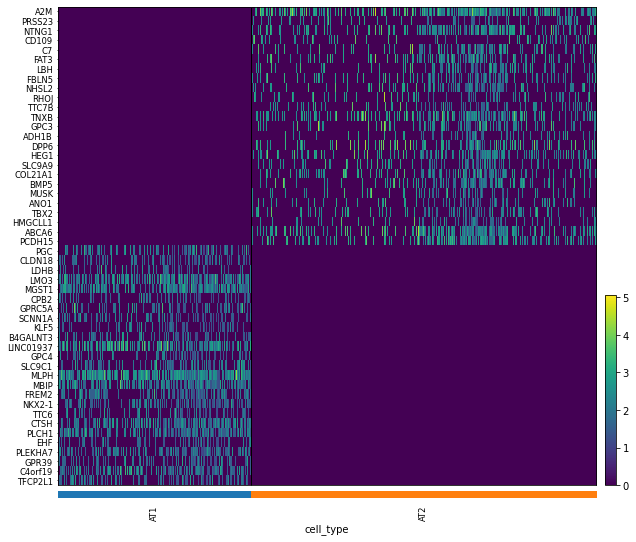

In [131]:
sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True)

### DE with scvi

In [ ]:
model  = scvi.model.SCVI.load('model.model', adata)

In [ ]:
model

In [ ]:
scvi_de = model.differential_expression(
    idx1 = [adata.obs['cell type'] == 'AT1'],
    idx2 = [adata.obs['cell type'] == 'AT2']
    )

#any set of cells vs any set of cells
# scvi_de = model.differential_expression(
#     idx1 = [(adata.obs['cell type'].isin(['AT1', 'AT2'])) & (adata.obs.condition == 'COVID19')],
#     idx2 = [(adata.obs['cell type'].isin(['AT1', 'AT2'])) & (adata.obs.condition == 'control')]
#     )

In [ ]:
scvi_de

In [ ]:
scvi_de = scvi_de[(scvi_de['is_de_fdr_0.05']) & (abs(scvi_de.lfc_mean) > .5)]
scvi_de = scvi_de.sort_values('lfc_mean')
scvi_de

In [ ]:
scvi_de = scvi_de[(scvi_de.raw_normalized_mean1 > .5) | (scvi_de.raw_normalized_mean2 > .5)]
scvi_de

In [ ]:
genes_to_show = scvi_de[-25:].index.tolist() + scvi_de[:25].index.tolist() #top 25 and bottom 25 from sorted df


In [ ]:

sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True, layer = 'scvi_normalized',
              log = True)

# GO enrichment

In [132]:
!pip install gseapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 10.1 MB/s 


In [133]:
import gseapy as gp #this method requires internet connection

In [134]:
gp.get_library_name()
# 'GO_Biological_Process_2021',
#'KEGG_2021_Human',

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisGeNET',
 'Disease_

In [135]:
subset

AnnData object with n_obs × n_vars = 1090 × 3439
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'cell_type'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups', 'cell type_colors', 'markers', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [136]:
dedf

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,PGC,0.0,0.0,297.776029,0.274895,False,2.252332e-10,-297.776029,2.222759e-162,-472.649544
1,CLDN18,0.0,0.0,297.776029,0.210905,False,2.441329e-10,-297.776029,2.222759e-162,-408.787909
2,LDHB,0.0,0.0,297.776029,0.174559,False,6.782783e-11,-297.776029,2.222759e-162,-362.421910
3,LMO3,0.0,0.0,297.776029,0.482876,False,4.434926e-05,-297.776029,2.222759e-162,-590.569562
4,MGST1,0.0,0.0,297.776029,0.508471,False,6.614452e-08,-297.776029,2.222759e-162,-584.209625
...,...,...,...,...,...,...,...,...,...,...
3434,ANO1,0.0,0.0,-283.913085,0.246670,False,2.110086e-01,283.913085,2.222759e-162,-1871.767770
3435,TBX2,0.0,0.0,-283.913085,0.347979,False,2.899085e-01,283.913085,2.222759e-162,-2581.544885
3436,HMGCLL1,0.0,0.0,-283.913085,0.256435,False,2.275224e-01,283.913085,2.222759e-162,-2007.950906
3437,ABCA6,0.0,0.0,-283.913085,0.639748,False,4.954124e-01,283.913085,2.222759e-162,-4458.002180


In [137]:
dedf[dedf.log2fc > 0].gene.tolist()

['PGC',
 'CLDN18',
 'LDHB',
 'LMO3',
 'MGST1',
 'CPB2',
 'GPRC5A',
 'SCNN1A',
 'KLF5',
 'B4GALNT3',
 'LINC01937',
 'GPC4',
 'SLC9C1',
 'MLPH',
 'MBIP',
 'FREM2',
 'NKX2-1',
 'TTC6',
 'CTSH',
 'PLCH1',
 'EHF',
 'PLEKHA7',
 'GPR39',
 'C4orf19',
 'TFCP2L1',
 'ESRP1',
 'ACSL1',
 'C8orf34',
 'AC010197.1',
 'WIF1',
 'SLC26A9',
 'SFTPD',
 'STK33',
 'FGFR2',
 'TMEM163',
 'LAMP3',
 'CD38',
 'PLA2G4F',
 'GRAMD2A',
 'SFTPA2',
 'SFTPA1',
 'ALPL',
 'DUOXA1',
 'AC010998.1',
 'LRP2',
 'CACNA2D2',
 'CACNB4',
 'SCN1A',
 'P3H2',
 'SCN1A-AS1',
 'ITGB6',
 'AC019117.2',
 'SGPP2',
 'AC092640.1',
 'CCDC141',
 'LINC01811',
 'RMST',
 'LTA4H',
 'C4BPA',
 'GCNT2',
 'LPCAT1',
 'SGMS2',
 'AC019117.1',
 'ABCA3',
 'RBM47',
 'TMC5',
 'SFTPB',
 'PARM1',
 'CDKL2',
 'LRRC36',
 'CDH1',
 'SLC22A31',
 'PTPN3',
 'ALOX15B',
 'TOX',
 'AC016745.1',
 'AC096564.1',
 'RASEF',
 'HNF1B',
 'FAM160A1',
 'AC046195.2',
 'AC046195.1',
 'KCNQ3',
 'WWC1',
 'FHDC1',
 'KCNK1',
 'TLR2',
 'PPP1R14C',
 'SLC34A2',
 'HOPX',
 'AC016987.1',
 'STEA

In [138]:
enr = gp.enrichr(gene_list= dedf[dedf.log2fc > 0].gene.tolist(),
                 gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021'],
                 organism='human', # don't forget to set organism to the one you desired!
                 outdir=None, # don't write to disk,
                 background = subset.var_names.tolist()
                )

In [139]:
enr.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Endocytosis,40/252,0.000004,0.001161,0,0,2.391679,29.757707,SH3KBP1;WIPF2;NEDD4L;WASL;PRKCZ;ACTR3C;SNX1;GR...
1,KEGG_2021_Human,MAPK signaling pathway,42/294,0.000032,0.004235,0,0,2.110957,21.833411,EFNA5;DUSP16;STK3;IKBKB;RPS6KA3;PPP3CA;PPP3R1;...
2,KEGG_2021_Human,Pancreatic secretion,20/102,0.000052,0.004235,0,0,3.071105,30.286730,SLC12A2;CHRM3;CPB2;ATP2B4;SCTR;ITPR2;ATP2A2;IT...
3,KEGG_2021_Human,Neurotrophin signaling pathway,22/119,0.000058,0.004235,0,0,2.857391,27.892551,YWHAE;MAP2K1;CAMK2D;SHC3;MAP3K1;MAGED1;KIDINS2...
4,KEGG_2021_Human,Tight junction,27/169,0.000125,0.007327,0,0,2.397837,21.557313,PATJ;NEDD4L;PPP2R2A;PRKCZ;ACTR3C;RAP1A;MYH14;S...
...,...,...,...,...,...,...,...,...,...,...
4504,GO_Biological_Process_2021,ribosome biogenesis (GO:0042254),5/192,0.998923,0.999383,0,0,0.331359,0.000357,NOP58;NVL;XRN2;DHX29;WDR43
4505,GO_Biological_Process_2021,cellular response to lipopolysaccharide (GO:00...,2/120,0.999001,0.999383,0,0,0.210412,0.000210,LYN;MEF2C
4506,GO_Biological_Process_2021,SRP-dependent cotranslational protein targetin...,1/90,0.999043,0.999383,0,0,0.139612,0.000134,SEC63
4507,GO_Biological_Process_2021,rRNA processing (GO:0006364),4/173,0.999146,0.999383,0,0,0.293411,0.000251,NOP58;NVL;XRN2;WDR43


## comparisons

This is for covid vs. control, so let's stop here.

In [ ]:
sc.pl.violin(subset[subset.obs.cell_type == 'AT2'], 'ETV5', groupby='condition')

In [ ]:
from scipy import stats

In [ ]:
temp = subset[subset.obs.cell_type == 'AT2']

i = np.where(temp.var_names == 'ETV5')[0][0]

In [ ]:
a = temp[temp.obs.condition == 'COVID19'].X[:,i]
b = temp[temp.obs.condition == 'control'].X[:,i]

In [ ]:
a

In [ ]:
stats.mannwhitneyu(a, b)

## Score gene signature

In [ ]:
#gene signature, ie, input list of genes from user
with open('datp_sig.txt') as f:
    datp_sig = [x.strip() for x in list(f)]


In [ ]:
datp_sig

In [ ]:
sc.tl.score_genes(subset, datp_sig, score_name = 'datp')

In [ ]:
subset.obs

In [ ]:
sc.pl.violin(subset, 'datp', groupby='condition')

In [ ]:
a = subset[subset.obs.condition == 'COVID19'].obs.datp.values
b = subset[subset.obs.condition == 'control'].obs.datp.values
stats.mannwhitneyu(a, b)

In [ ]:
sc.pl.umap(subset, color = 'datp', vmax = 1)

In [ ]:
# for thumbnail

In [140]:
from matplotlib.pyplot import rc_context


In [141]:
adata

AnnData object with n_obs × n_vars = 5960 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'cell type'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups', 'cell type_colors', 'markers'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

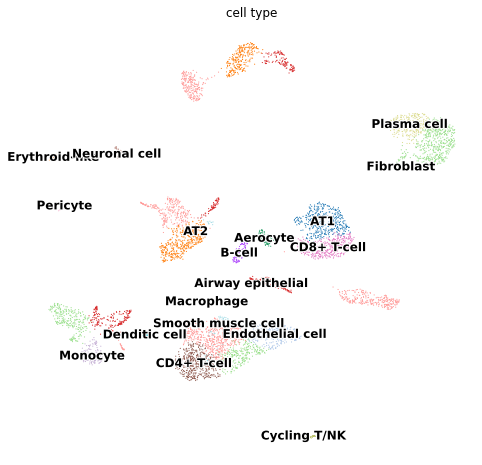

In [142]:
with rc_context({'figure.figsize': (8,8)}):
    sc.pl.umap(adata, color = ['cell type'], frameon = False, s = 5, legend_loc = 'on data',
              legend_fontsize=12, legend_fontoutline=2)

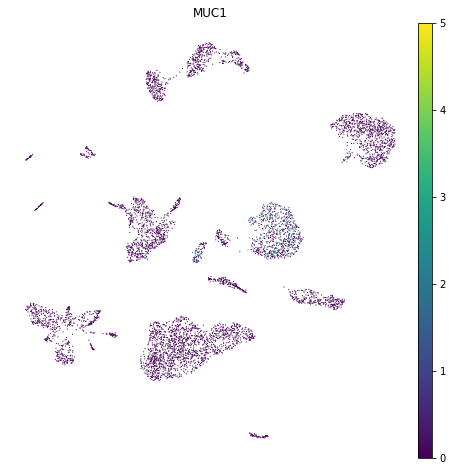

In [144]:
with rc_context({'figure.figsize': (8,8)}):
    sc.pl.umap(adata, color = ['MUC1'], frameon = False, 
               vmax = 5, s = 5)
    # layer = 'scvi_normalized'

In [145]:
# save files
!zip adata_single.h5ad.zip adata_single.h5ad

  adding: adata_single.h5ad (deflated 89%)


In [146]:
from google.colab import files
files.download('adata_single.h5ad.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [150]:
!ls -lh

total 786M
-rw-r--r-- 1 root root 707M Oct 25 16:03 adata_single.h5ad
-rw-r--r-- 1 root root  80M Oct 25 16:48 adata_single.h5ad.zip
drwxr-xr-x 2 root root 4.0K Oct 25 15:09 raw_counts
drwxr-xr-x 1 root root 4.0K Oct 21 13:33 sample_data
drwxr-xr-x 3 root root 4.0K Oct 25 15:08 singlecell
